In [52]:
#Importando as bibliotecas para manipulação dos dados do futebol
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [4]:
#carregando arquivo csv onde esta meu conjunto de dados
data = pd.read_csv('/home/gabriel/Downloads/BRA.csv')
data.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,...,5.25,1.76,3.87,5.31,1.69,3.50,4.90,NaN,NaN,NaN
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,...,2.68,2.83,3.42,2.70,2.59,3.23,2.58,NaN,NaN,NaN
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,...,6.72,1.67,4.05,7.22,1.59,3.67,5.64,NaN,NaN,NaN
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,...,3.15,2.49,3.39,3.15,2.35,3.26,2.84,NaN,NaN,NaN
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,...,4.41,1.96,3.53,4.41,1.89,3.33,3.89,NaN,NaN,NaN


In [5]:
#pegando todas as colunas de nosso dataset
data.columns

Index(['Country', 'League', 'Season', 'Date', 'Time', 'Home', 'Away', 'HG',
       'AG', 'Res', 'PSCH', 'PSCD', 'PSCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH',
       'AvgCD', 'AvgCA', 'BFECH', 'BFECD', 'BFECA'],
      dtype='object')

In [6]:
#há bastante dados nulos no nosso dataset
data.isna().sum()

Country       0
League        0
Season        0
Date          0
Time          0
Home          0
Away          0
HG            1
AG            1
Res           1
PSCH          1
PSCD          1
PSCA          1
MaxCH         0
MaxCD         0
MaxCA         0
AvgCH         0
AvgCD         0
AvgCA         0
BFECH      4705
BFECD      4705
BFECA      4705
dtype: int64

In [7]:
# Substituir todos os valores nulos por 0
data_preenchido = data.fillna(0)

# Verificar se ainda há valores nulos
print(data_preenchido.isnull().sum())

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         0
AG         0
Res        0
PSCH       0
PSCD       0
PSCA       0
MaxCH      0
MaxCD      0
MaxCA      0
AvgCH      0
AvgCD      0
AvgCA      0
BFECH      0
BFECD      0
BFECA      0
dtype: int64


In [8]:
data_preenchido.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,...,5.25,1.76,3.87,5.31,1.69,3.50,4.90,0.0,0.0,0.0
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,...,2.68,2.83,3.42,2.70,2.59,3.23,2.58,0.0,0.0,0.0
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,...,6.72,1.67,4.05,7.22,1.59,3.67,5.64,0.0,0.0,0.0
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,...,3.15,2.49,3.39,3.15,2.35,3.26,2.84,0.0,0.0,0.0
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,...,4.41,1.96,3.53,4.41,1.89,3.33,3.89,0.0,0.0,0.0


In [9]:
# Dicionário de mapeamento
mapeamento = {'D': 0, 'H': 1, 'A': 2}

# Aplicar o mapeamento na coluna Res
data_preenchido['Res'] = data['Res'].map(mapeamento)

# Verificar o resultado
print(data['Res'].value_counts())

Res
H    2390
D    1329
A    1220
Name: count, dtype: int64


In [10]:
data_preenchido.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,0.0,...,5.25,1.76,3.87,5.31,1.69,3.50,4.90,0.0,0.0,0.0
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,0.0,...,2.68,2.83,3.42,2.70,2.59,3.23,2.58,0.0,0.0,0.0
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,1.0,...,6.72,1.67,4.05,7.22,1.59,3.67,5.64,0.0,0.0,0.0
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,1.0,...,3.15,2.49,3.39,3.15,2.35,3.26,2.84,0.0,0.0,0.0
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,2.0,...,4.41,1.96,3.53,4.41,1.89,3.33,3.89,0.0,0.0,0.0


In [11]:
#ainda há um valor nulo na coluna Res
print(data_preenchido.isnull().sum())

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         0
AG         0
Res        1
PSCH       0
PSCD       0
PSCA       0
MaxCH      0
MaxCD      0
MaxCA      0
AvgCH      0
AvgCD      0
AvgCA      0
BFECH      0
BFECD      0
BFECA      0
dtype: int64


In [12]:
data_preenchido = data_preenchido.fillna(0)

In [13]:
print(data_preenchido.isnull().sum())

Country    0
League     0
Season     0
Date       0
Time       0
Home       0
Away       0
HG         0
AG         0
Res        0
PSCH       0
PSCD       0
PSCA       0
MaxCH      0
MaxCD      0
MaxCA      0
AvgCH      0
AvgCD      0
AvgCA      0
BFECH      0
BFECD      0
BFECA      0
dtype: int64


In [14]:
print(data_preenchido.dtypes)

Country     object
League      object
Season       int64
Date        object
Time        object
Home        object
Away        object
HG         float64
AG         float64
Res        float64
PSCH       float64
PSCD       float64
PSCA       float64
MaxCH      float64
MaxCD      float64
MaxCA      float64
AvgCH      float64
AvgCD      float64
AvgCA      float64
BFECH      float64
BFECD      float64
BFECA      float64
dtype: object


In [15]:
data_preenchido['Res'] = data_preenchido['Res'].astype(int)
data_preenchido['HG'] = data_preenchido['HG'].astype(int)
data_preenchido['AG'] = data_preenchido['AG'].astype(int)

In [16]:
print(data_preenchido.dtypes)

Country     object
League      object
Season       int64
Date        object
Time        object
Home        object
Away        object
HG           int64
AG           int64
Res          int64
PSCH       float64
PSCD       float64
PSCA       float64
MaxCH      float64
MaxCD      float64
MaxCA      float64
AvgCH      float64
AvgCD      float64
AvgCA      float64
BFECH      float64
BFECD      float64
BFECA      float64
dtype: object


In [17]:
data_preenchido.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1,1,0,...,5.25,1.76,3.87,5.31,1.69,3.50,4.90,0.0,0.0,0.0
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1,1,0,...,2.68,2.83,3.42,2.70,2.59,3.23,2.58,0.0,0.0,0.0
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2,1,1,...,6.72,1.67,4.05,7.22,1.59,3.67,5.64,0.0,0.0,0.0
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4,2,1,...,3.15,2.49,3.39,3.15,2.35,3.26,2.84,0.0,0.0,0.0
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0,1,2,...,4.41,1.96,3.53,4.41,1.89,3.33,3.89,0.0,0.0,0.0


In [18]:
matches = data_preenchido.shape[0]
features = data_preenchido.shape[1] -1 #somente retirando a coluna de resultado
home_win = len(data_preenchido[data_preenchido.Res==1]) #times que venceram em casa
away_win = len(data_preenchido[data_preenchido.Res==2]) #times que venceram fora de casa
draw = len(data[data_preenchido.Res==0]) #empates
val = [home_win,away_win,draw]

win_rate = ((home_win/matches)) * 100
print(f'Total de jogos: {matches}')
print(f'Total de features: {features}')
print(f'Total de vitórias em casa: {home_win}')
print(f'Total de vitórias fora de casa: {away_win}')
print(f'Total de empates: {draw}')
print(f'Taxa de vitórias em casa: {win_rate}')

Total de jogos: 4940
Total de features: 21
Total de vitórias em casa: 2390
Total de vitórias fora de casa: 1220
Total de empates: 1330
Taxa de vitórias em casa: 48.38056680161944


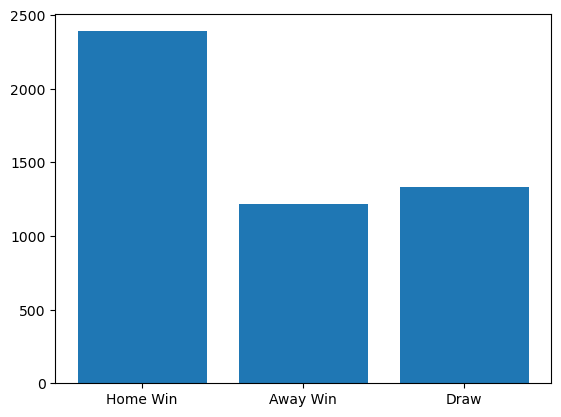

In [19]:
x = np.arange(3)
plt.bar(x, val)
plt.xticks(x, ('Home Win', 'Away Win', 'Draw'))
plt.show()

In [20]:
#tirado as colunas que não vamos usar como features para o nosso modelo
data_preenchido = data_preenchido.drop(['Country','League','Season','Date','Time','Home','Away'],axis=1)
display(data_preenchido.head())

,HG,AG,Res,PSCH,PSCD,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
0,1,1,0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,0.0,0.0,0.0
1,1,1,0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,0.0,0.0,0.0
2,2,1,1,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,0.0,0.0,0.0
3,4,2,1,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,0.0,0.0,0.0
4,0,1,2,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,0.0,0.0,0.0


In [21]:
#separa as features 
features = data_preenchido.drop(['Res'],axis = 1)


#separa as labels
labels = data_preenchido['Res']

print('Features')
print (features.head())

print ('=========')

print ('Labels')
print (labels.head())

Features
   HG  AG  PSCH  PSCD  PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA  BFECH  \
0   1   1  1.75  3.86  5.25   1.76   3.87   5.31   1.69   3.50   4.90    0.0   
1   1   1  2.83  3.39  2.68   2.83   3.42   2.70   2.59   3.23   2.58    0.0   
2   2   1  1.60  4.04  6.72   1.67   4.05   7.22   1.59   3.67   5.64    0.0   
3   4   2  2.49  3.35  3.15   2.49   3.39   3.15   2.35   3.26   2.84    0.0   
4   0   1  1.96  3.53  4.41   1.96   3.53   4.41   1.89   3.33   3.89    0.0   

   BFECD  BFECA  
0    0.0    0.0  
1    0.0    0.0  
2    0.0    0.0  
3    0.0    0.0  
4    0.0    0.0  
Labels
0    0
1    0
2    1
3    1
4    2
Name: Res, dtype: int64


In [22]:
#Mudando as features que correspondem aos gols de time de fora e de casa para números inteiros
features['HG'] = features['HG'].astype(int)
features['AG'] = features['AG'].astype(int)

features.dtypes

HG         int64
AG         int64
PSCH     float64
PSCD     float64
PSCA     float64
MaxCH    float64
MaxCD    float64
MaxCA    float64
AvgCH    float64
AvgCD    float64
AvgCA    float64
BFECH    float64
BFECD    float64
BFECA    float64
dtype: object

In [23]:
#Escoolhendo as melhores features com Kbest

features_list = ('HG','AG','PSCH','PSCD','PSCA','MaxCH','MaxCD','MaxCA','AvgCH','AvgCD','AvgCA')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'AG': 1639.9809482508954, 'PSCH': 1606.6736092393226, 'PSCD': 218.25438574664193, 'AvgCD': 214.14590495899094, 'MaxCD': 194.6196018056915, 'MaxCH': 189.7369711464436, 'AvgCH': 186.4587199696964, 'MaxCA': 96.854163566097, 'AvgCA': 95.60647959054353, 'PSCA': 94.22452578919452}


In [24]:
#separa as features com base nas melhores features para treinamento
features = data_preenchido.drop(['Res','AG','PSCH','PSCD'],axis = 1)


#separa as labels para treinamento
labels = data_preenchido['Res']

print('Features')
print (features.head())

print ('=========')

print ('Labels')
print (labels.head())

Features
   HG  PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA  BFECH  BFECD  BFECA
0   1  5.25   1.76   3.87   5.31   1.69   3.50   4.90    0.0    0.0    0.0
1   1  2.68   2.83   3.42   2.70   2.59   3.23   2.58    0.0    0.0    0.0
2   2  6.72   1.67   4.05   7.22   1.59   3.67   5.64    0.0    0.0    0.0
3   4  3.15   2.49   3.39   3.15   2.35   3.26   2.84    0.0    0.0    0.0
4   0  4.41   1.96   3.53   4.41   1.89   3.33   3.89    0.0    0.0    0.0
Labels
0    0
1    0
2    1
3    1
4    2
Name: Res, dtype: int64


In [25]:
#Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print ('Features: ',features_scale.shape)
print (features_scale)


Features:  (4940, 11)
[[0.14285714 0.17748479 0.02400573 ... 0.         0.         0.        ]
 [0.14285714 0.09060176 0.06234325 ... 0.         0.         0.        ]
 [0.28571429 0.22718053 0.02078108 ... 0.         0.         0.        ]
 ...
 [0.         0.08992563 0.06019348 ... 0.286      0.53787879 0.135     ]
 [0.         0.12136579 0.04012899 ... 0.22       0.53787879 0.1875    ]
 [0.         0.23157539 0.01504837 ... 0.148      0.74242424 0.39      ]]


In [26]:
from sklearn.model_selection import train_test_split
"""X_train = features_scale[:1932]
X_test = features_scale[1932:2155]
y_train = labels[:1932]
y_test = labels[1932:2155]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))"""

X_train, X_test, y_train, y_test = train_test_split(features_scale, labels, test_size=0.2, random_state=42, stratify=labels)



In [27]:
#Treinando e testando os modelos
print ('LogisticRegression')


clf_LR = LogisticRegression(multi_class='multinomial',max_iter=2000)
clf_LR.fit(X_train, y_train)
pred= clf_LR.predict(X_test)

lg_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred,average = 'micro')
print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

LogisticRegression


/home/gabriel/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Acurácia LogisticRegression:0.6437246963562753
F1 Score:0.6437246963562753


In [35]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

search.fit(X_train,y_train)
clf = search.best_estimator_
pred= clf.predict(X_test)
lg_acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'macro')

print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

print (clf)


Acurácia LogisticRegression:0.6366396761133604
F1 Score:0.4866614615927176
LogisticRegression(C=0.1, max_iter=1000)


In [39]:
print('SVC')

clf= SVC()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

svc_acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='micro')
print('Acurácia Svc:{}'.format(svc_acc))
print('f1 Score:{}'.format(f1))

SVC
Acurácia Svc:0.638663967611336
f1 Score:0.638663967611336


In [47]:
param_grid = {'C': [0.001,0.01, 0.1,1,10,100,1000]}
search = GridSearchCV(SVC(),param_grid)

search.fit(X_train,y_train)
clf_SVC = search.best_estimator_
pred= clf_SVC.predict(X_test)
acc = accuracy_score(y_test,pred)

f1 = f1_score(y_test,pred,average = 'micro')

print('F1 Score:{}'.format(f1))
print('Acurácia SVC{}'.format(acc))
print(clf_SVC)

F1 Score:0.6346153846153846
Acurácia SVC0.6346153846153846
SVC(C=10)


In [48]:
print('Decision Tree')

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

dt_acc = accuracy_score(y_test,pred)
f1= f1_score(y_test,pred,average = 'macro')
print('Acurácia Tree:{}'.format(dt_acc))
print('F1 SCore:{}'.format(f1))

n_estimators = [10,50,100,200]
max_depth = [3,10,20,40]

Decision Tree
Acurácia Tree:0.5657894736842105
F1 SCore:0.5187660064079255


In [59]:
print('Decision Tree - Otimização de Hiperparâmetros')

# Definição da grade de parâmetros
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}

search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,                  
    scoring='accuracy',     
    n_jobs=-1,             
    verbose=1              
)

# Treinamento do modelo
search.fit(X_train, y_train)

# Obtenção do melhor modelo
best_clf = search.best_estimator_

# Previsões e avaliação
y_pred = best_clf.predict(X_test)  # Nome mais descritivo para as previsões
dt_acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

# Resultados detalhados
print('\n=== Resultados ===')
print(f'Acurácia Decision Tree: {dt_acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nMelhores parâmetros encontrados:')
for param, value in search.best_params_.items():
    print(f'{param}: {value}')

print('\nMelhor estimador:')
print(best_clf)

Decision Tree - Otimização de Hiperparâmetros
Fitting 5 folds for each of 72 candidates, totalling 360 fits

=== Resultados ===
Acurácia Decision Tree: 0.5719
F1 Score: 0.5719

Melhores parâmetros encontrados:
max_depth: 80
max_features: 3
min_samples_leaf: 5
min_samples_split: 8

Melhor estimador:
DecisionTreeClassifier(max_depth=80, max_features=3, min_samples_leaf=5,
                       min_samples_split=8, random_state=42)


In [60]:
print('Naive baeys')

clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

nb_acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average = 'micro')
print('Acurácia Naive baeys:{}'.format(nb_acc))
print('F1 SCore:[{}'.format(f1))

Naive baeys
Acurácia Naive baeys:0.5587044534412956
F1 SCore:[0.5587044534412956


In [66]:
previsao = features_scale[2155:]
game_id_full = data_preenchido.index
game_id = game_id_full[2155:]

res_full = data['Res']
res = res_full[2155:]

pred = clf_SVC.predict(previsao)
df = pd.DataFrame({'real': res, 'previsao':pred, 'game_id':game_id})

print(df)

     real  previsao  game_id
2155    D         1     2155
2156    H         1     2156
2157    H         1     2157
2158    A         2     2158
2159    H         0     2159
...   ...       ...      ...
4935    D         1     4935
4936    H         1     4936
4937    A         2     4937
4938    A         2     4938
4939    A         2     4939

[2785 rows x 3 columns]


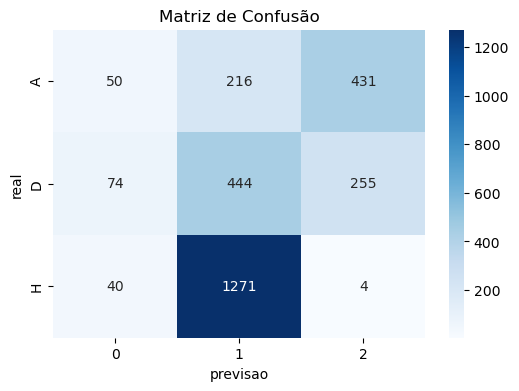

In [69]:
df = pd.DataFrame(df, columns = ['real','previsao'])

plt.figure(figsize=(6, 4))
sns.heatmap(
    cf_matrix, 
    annot=True, 
    cmap='Blues',
    fmt='d'  # Formato inteiro
)
plt.title('Matriz de Confusão')
plt.show()

